In [18]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# print(df)
df["target"] = diabetes.target
print(df.tail())
print(df.info())

          age       sex       bmi        bp        s1        s2        s3  \
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018118  0.044485   104.0  
439 -0.011080 -0.046879  0.015491   132.0  
440  0.026560  0.044528 -0.025930   220.0  
441 -0.039493 -0.004220  0.003064    57.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non

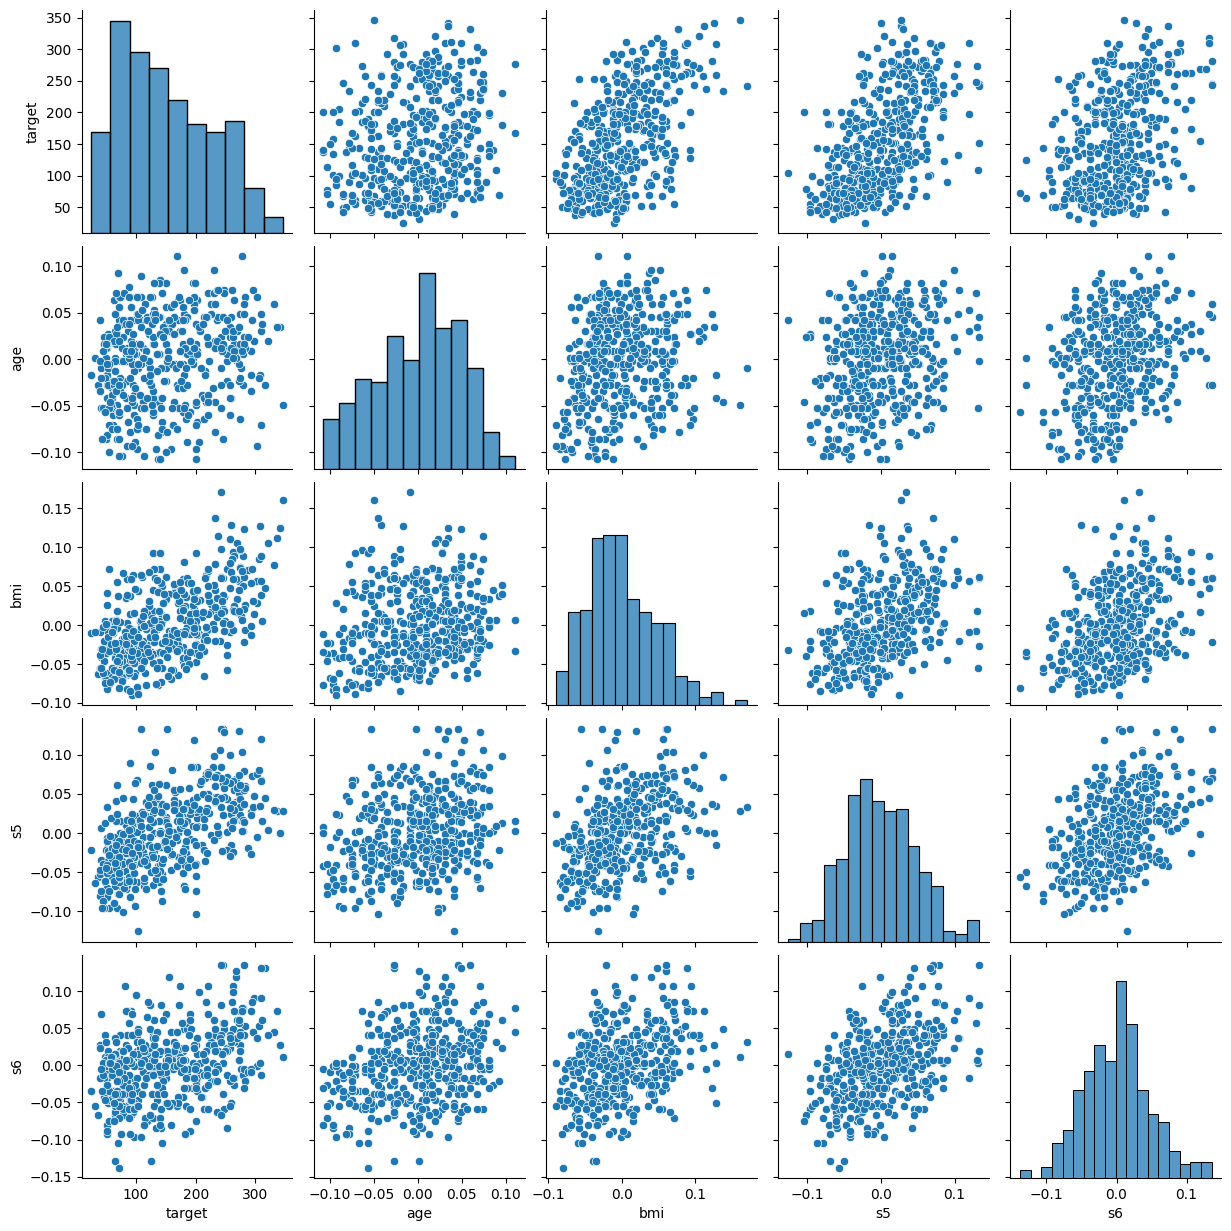

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df[["target","age", "bmi", "s5", "s6"]])
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [21]:
corr_order = df.corr().loc[:'age', 's6'].abs().sort_values(ascending=False)
corr_order

age    0.301731
Name: s6, dtype: float64

In [22]:
plot_cols = ['s6','s5','bmi','age']
plot_df = df.loc[:, plot_cols]
plot_df

,s6,s5,bmi,age
0,-0.017646,0.019908,0.061696,0.038076
1,-0.092204,-0.068330,-0.051474,-0.001882
2,-0.025930,0.002864,0.044451,0.085299
3,-0.009362,0.022692,-0.011595,-0.089063
4,-0.046641,-0.031991,-0.036385,0.005383
...,...,...,...,...
437,0.007207,0.031193,0.019662,0.041708
438,0.044485,-0.018118,-0.015906,-0.005515
439,0.015491,-0.046879,-0.015906,0.041708
440,-0.025930,0.044528,0.039062,-0.045472


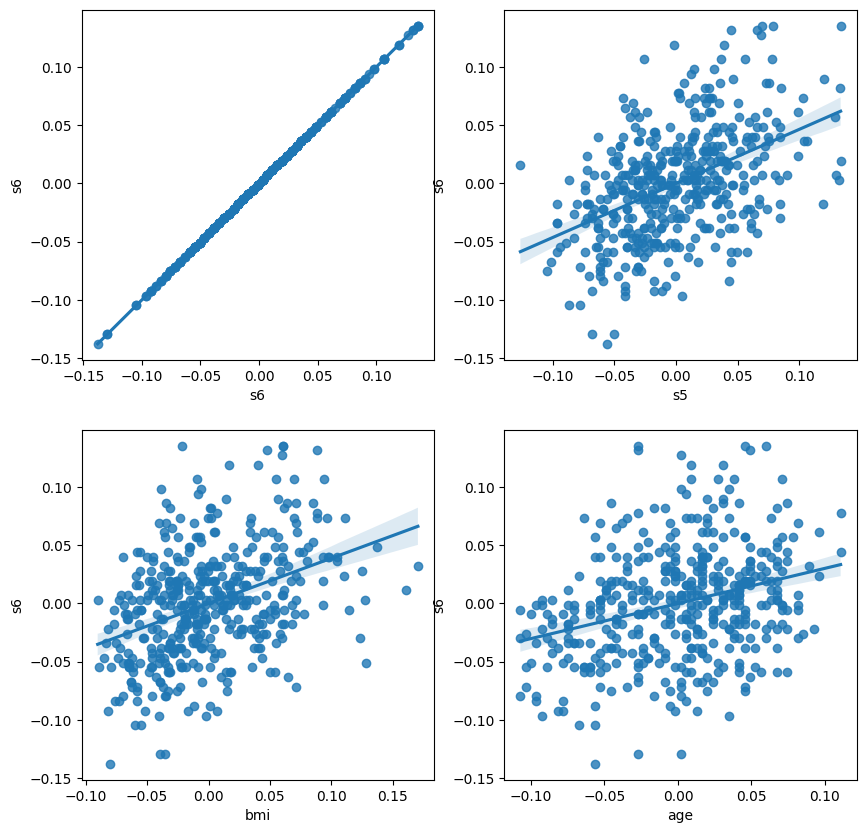

In [23]:
# regplot으로 선형회귀선 표시
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[:]):
    axl = plt.subplot(2, 2, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=axl)
plt.show()

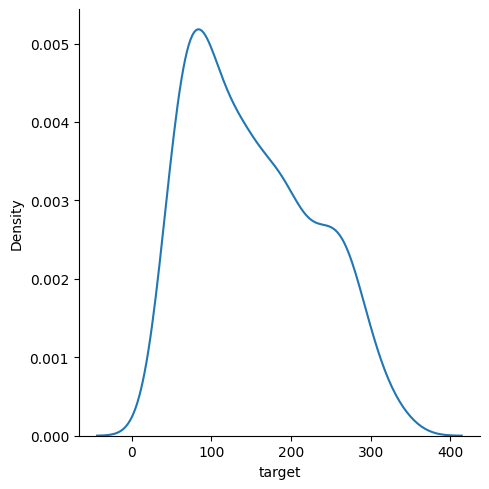

In [24]:
# MEDV 데이터 분포
sns.displot(x='target', kind='kde', data=df)
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.iloc[:,:-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)
df.iloc[:,:-1] = df_scaled[:,:]
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,151.0
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222443,0.166667,75.0
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496584,0.409091,141.0
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572936,0.469697,206.0
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362369,0.333333,135.0


In [26]:
from sklearn.model_selection import train_test_split
X_data = df.loc[:,['age', 'bmi']]
y_data = df.loc[:, 'target']
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(353, 2) (353,)
(89, 2) (89,)


In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.fit(x_train, y_train)
print("회귀계수(기울기):", np.round(lr.coef_, 1))
print("상수항(절편):", np.round(lr.intercept_, 1))

회귀계수(기울기): [ 25.4 247.2]
상수항(절편): 55.2


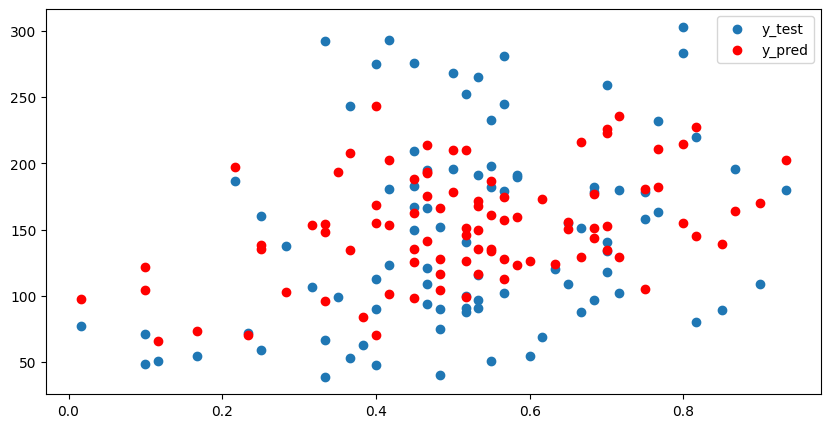

In [28]:
y_test_pred = lr.predict(x_test)
plt.figure(figsize=(10,5)) 
plt.scatter(x_test['age'], y_test, label='y_test')
plt.scatter(x_test['age'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %3f" % test_mse)

Train MSE:3858.675873
Test MSE: 3837.961196


In [30]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_score = -1*cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("개별 Fold의 MSE:", np.round(mse_score, 4))
print("평균 MSE:%4f" % np.mean(mse_score))

개별 Fold의 MSE: [3854.0716 3982.0299 4442.5347 4244.8921 3570.2026]
평균 MSE:4018.746167


In [31]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print("원본 학습 데이터 셋:", x_train.shape) # 2개인 이유 LATST, RM 이 두가지 값을 가지기 때문이고
print("2차 다항식 변환 데이터 셋:", x_train_poly.shape)

원본 학습 데이터 셋: (353, 2)
2차 다항식 변환 데이터 셋: (353, 6)


In [32]:
# 2차 다항식 변환 데이터셋으로 선형 회귀 모델 모형 학습
lr = LinearRegression()
lr.fit(x_train_poly, y_train) # y_train은 실제 결과값

# 테스트 데이터에 대한 예측 밒 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

x_test_poly = pf.fit_transform(x_test) # 학습한 예측결과랑 test값의 예측 결과 파악
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%3f" % test_mse)

Train MSE:3738.787796
Test MSE:4049.386180


In [33]:
# 15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
pf = PolynomialFeatures(degree=15)
x_train_poly = pf.fit_transform(x_train)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.3f" % train_mse)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE: 47236.856
Test MSE:6373545.9663


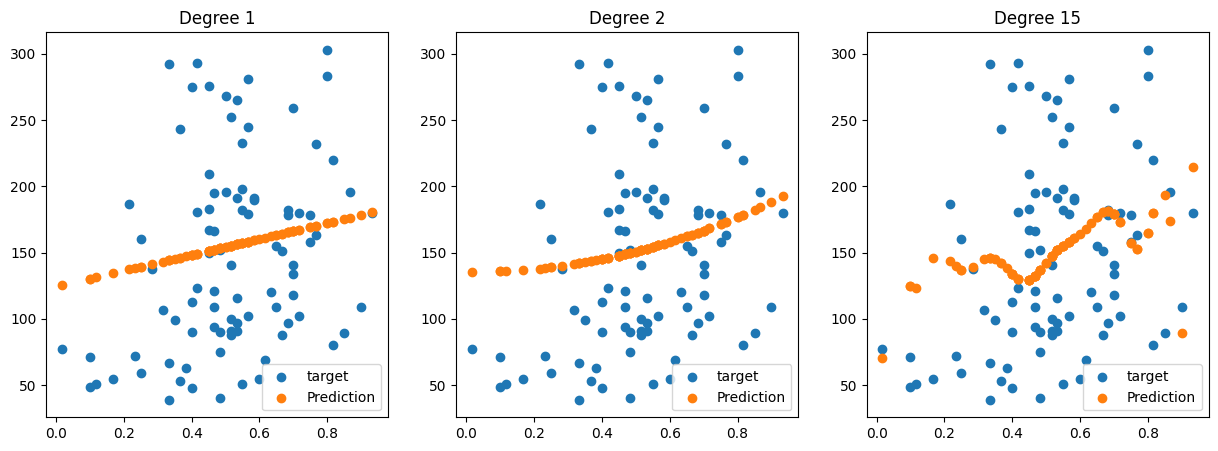

In [35]:
# 다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15,5))
for n, deg in enumerate([1, 2, 15]):
    axl = plt.subplot(1,3, n+1)
    # plt.axis('off')
    # degree별 다항 회귀 모형 적용
    pf = PolynomialFeatures(degree=deg)
    x_train_poly = pf.fit_transform(x_train.loc[:,['age']])
    x_test_poly = pf.fit_transform(x_test.loc[:, ['age']])
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_test_pred = lr.predict(x_test_poly)
    # 실제값 분포
    plt.scatter(x_test.loc[:,['age']], y_test, label='target')
    # 예측값 분포
    plt.scatter(x_test.loc[:,['age']], y_test_pred, label='Prediction')
    # 제목 표시
    plt.title("Degree %d" % deg)
    # 범례 표시
    plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=2.5) # 알파값으로 강도를 조정
rdg.fit(x_train_poly, y_train)

y_train_pred = rdg.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)
y_test_pred = rdg.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:4076.3367
Test MSE:3522.2734


In [ ]:
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.05)
las.fit(x_train_poly, y_train)

y_train_pred = las.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)
y_test_pred = las.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:4000.3699
Test MSE:3546.9656


In [ ]:
# ElasticNet(L2/L1 규제)
from sklearn.linear_model import ElasticNet
ela = ElasticNet(alpha=0.01, l1_ratio=0.7)
ela.fit(x_train_poly, y_train)

y_train_pred = ela.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("train MSE:%.4f" % train_mse)
y_test_pred = ela.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("test_mse:%.4f" % test_mse)

train MSE:4040.8098
test_mse:3523.7831


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(x_train, y_train)

y_train_pred = dtr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = dtr.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:2946.4125
Test MSE:3796.3140


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=12)
rfr.fit(x_train, y_train)

y_train_pred = rfr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = rfr.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:2744.4208
Test MSE:3290.4294


In [ ]:
# XGBoost
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(x_train, y_train)

y_train_pred = xgbr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = xgbr.predict(x_test)
text_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:895.4028
Test MSE:3290.4294
